### Tensorflow training codes test
- File name: tf_train_test.ipynb
- Last updated: 2021.5.25

In [1]:
import tensorflow as tf

from tf_modules import get_dataloaders, SimpleCNN, ManualTrainer
from tf_modules import plot_images

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
## Parameters
seed = 11
tf.random.set_seed(seed)
n_epochs = 20
batch_size = 512

## Dataset
train_loader, valid_loader, test_loader = get_dataloaders(
        batch_size, seed=seed, flatten=False)

# Model
model = SimpleCNN()
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optim = tf.keras.optimizers.Adam()

## Training
trainer = ManualTrainer(model, optim, loss_fn)
trainer.fit(train_loader, valid_loader, n_epochs)
# trainer.plot_history()

Epoch [  1/ 20] >>> train_loss = 4.63e-01, valid_loss = 1.45e-01, lowest_loss = 1.45e-01 @epoch = 1
Epoch [  2/ 20] >>> train_loss = 7.94e-02, valid_loss = 7.77e-02, lowest_loss = 7.77e-02 @epoch = 2
Epoch [  3/ 20] >>> train_loss = 4.98e-02, valid_loss = 8.47e-02, lowest_loss = 7.77e-02 @epoch = 2
Epoch [  4/ 20] >>> train_loss = 3.89e-02, valid_loss = 5.20e-02, lowest_loss = 5.20e-02 @epoch = 4
Epoch [  5/ 20] >>> train_loss = 2.93e-02, valid_loss = 5.07e-02, lowest_loss = 5.07e-02 @epoch = 5
Epoch [  6/ 20] >>> train_loss = 2.27e-02, valid_loss = 4.68e-02, lowest_loss = 4.68e-02 @epoch = 6
Epoch [  7/ 20] >>> train_loss = 1.87e-02, valid_loss = 4.89e-02, lowest_loss = 4.68e-02 @epoch = 6
Epoch [  8/ 20] >>> train_loss = 1.53e-02, valid_loss = 4.95e-02, lowest_loss = 4.68e-02 @epoch = 6
Epoch [  9/ 20] >>> train_loss = 1.34e-02, valid_loss = 4.86e-02, lowest_loss = 4.68e-02 @epoch = 6
Epoch [ 10/ 20] >>> train_loss = 1.19e-02, valid_loss = 5.04e-02, lowest_loss = 4.68e-02 @epoch = 6


In [3]:
## Test
from tf_modules import accuracy, average

train_loss = average(loss_fn, model, train_loader)
valid_loss = average(loss_fn, model, valid_loader)
test_loss  = average(loss_fn, model, test_loader)

train_acc = average(accuracy, model, train_loader)
valid_acc = average(accuracy, model, valid_loader)
test_acc  = average(accuracy, model, test_loader)

print(">> train_loss = %.4f, train_acc = %.4f" % (train_loss, train_acc))
print(">> valid_loss = %.4f, valid_acc = %.4f" % (valid_loss, valid_acc))
print(">> test_loss  = %.4f, test_acc  = %.4f" % (test_loss, test_acc))

>> train_loss = 0.0185, train_acc = 0.9941
>> valid_loss = 0.0468, valid_acc = 0.9870
>> test_loss  = 0.0301, test_acc  = 0.9909


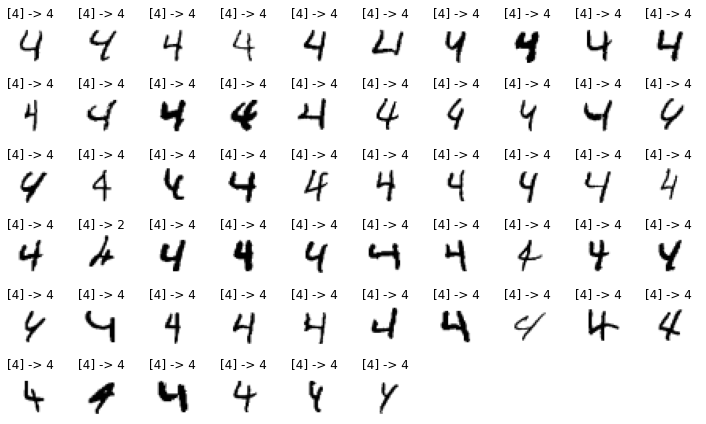

In [4]:
from tf_modules import select_condition

images, labels = next(iter(test_loader))
preds = tf.argmax(model(images), -1)

x, y, y_hat = select_condition(images, labels, preds, condition=[4])
plot_images(x, y, y_hat)

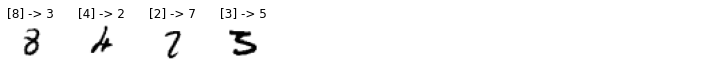

In [5]:
from tf_modules import select_incorrect

images, labels = next(iter(test_loader))
preds = tf.argmax(model(images), -1)

x, y, y_hat = select_incorrect(images, labels, preds)
plot_images(x, y, y_hat)

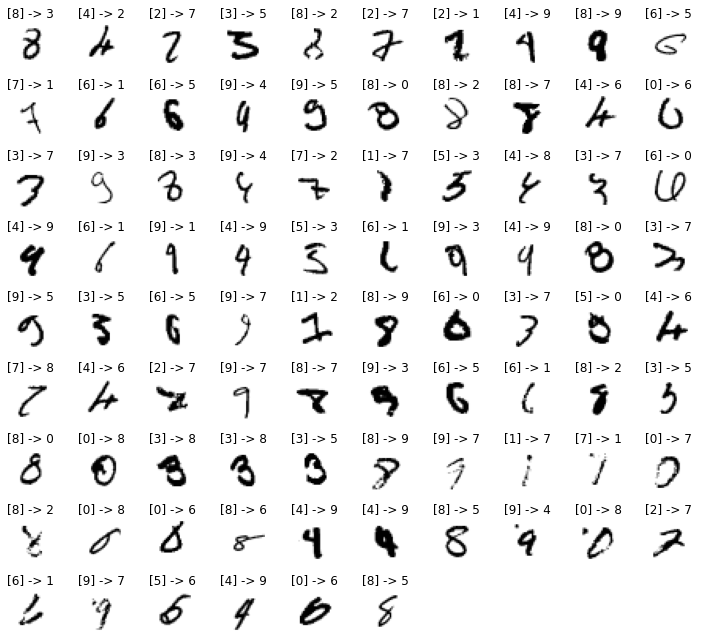

In [6]:
from tf_modules import select_incorrect_dataloader

images, labels, preds = select_incorrect_dataloader(model, test_loader)
plot_images(images, labels, preds)